Данные:

https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes?select=bmw.csv

# Анализ данных

целевой переменной является цена на автомобили из разных ценовых категорий. Признаки на основе которых будем предсказывать: модель автомобиля, год выпуска, трансмиссия, пробег, тип топлива, налоги, расход топлива, объем топлива.

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('cars.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
65533,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
65534,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
65535,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
65536,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [ ]:
df.model.value_counts()

,count
model,
Fiesta,6557
Focus,4588
C Class,3747
A Class,2561
3 Series,2443
...,...
Escort,1
Ranger,1
Transit Tourneo,1


Проверка на пропущенные значения, определения типа данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65538 entries, 0 to 65537
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         65538 non-null  object 
 1   year          65538 non-null  int64  
 2   price         65538 non-null  int64  
 3   transmission  65538 non-null  object 
 4   mileage       65538 non-null  int64  
 5   fuelType      65538 non-null  object 
 6   tax           65538 non-null  int64  
 7   mpg           65538 non-null  float64
 8   engineSize    65538 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 4.5+ MB


Пропущенных значений не выявлено

Анализ статистики данных, обнаружена анамалия в столбце year и price

In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,65538.000000,65538.000000,65538.000000,65538.000000,65538.000000,65538.000000
mean,2017.074247,18429.270744,23307.387043,120.223229,56.348439,1.744162
std,2.157000,10758.544264,21582.551957,64.980767,17.707617,0.613613
min,1970.000000,495.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,10995.000000,7292.000000,125.000000,47.900000,1.300000
50%,2017.000000,16000.000000,17400.500000,145.000000,56.500000,1.800000
75%,2019.000000,22980.750000,32672.750000,145.000000,64.200000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


Проверка на нормальность распределения

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'tax'}>],
       [<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'engineSize'}>]], dtype=object)

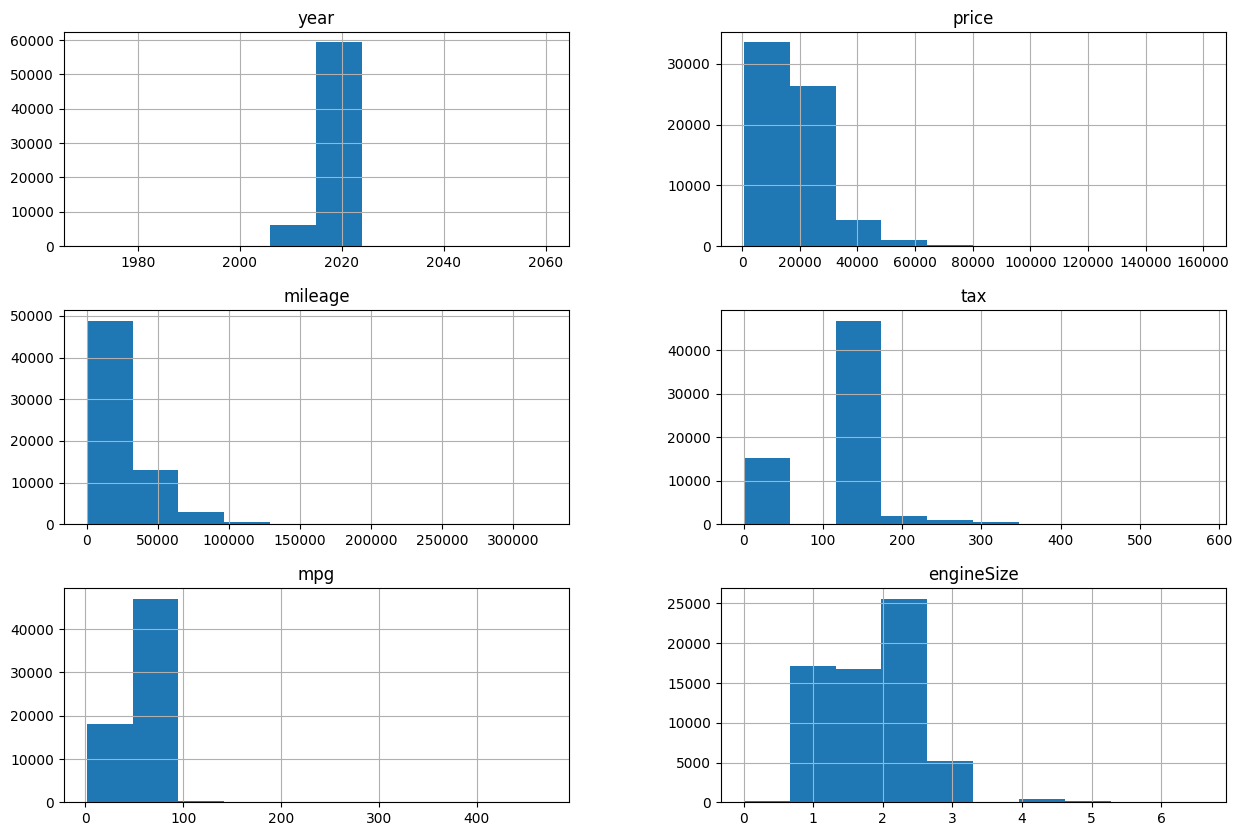

In [ ]:
df.hist(figsize=(15, 10))

Распределение данных отличны от нормального, что может сказаться на качестве модели

In [ ]:
df['model'] = df['model'].apply(lambda x: x.strip())

Проанализируем признак year

In [ ]:
df.year.describe()

,year
count,65538.000000
mean,2017.074247
std,2.157000
min,1970.000000
25%,2016.000000
50%,2017.000000
75%,2019.000000
max,2060.000000


Мы нашли только один выброс

In [ ]:
df[df['year'] >= 2025]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
41626,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4


Удалим его

In [ ]:
df = df[df['year'] < 2025]
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
65533,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
65534,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
65535,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
65536,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,65537.000000,65537.000000,65537.000000,65537.000000,65537.000000,65537.000000
mean,2017.073592,18429.452843,23306.906404,120.221936,56.348646,1.744167
std,2.150489,10758.525342,21582.365863,64.980418,17.707673,0.613616
min,1970.000000,495.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,10995.000000,7292.000000,125.000000,47.900000,1.300000
50%,2017.000000,16000.000000,17400.000000,145.000000,56.500000,1.800000
75%,2019.000000,22981.000000,32672.000000,145.000000,64.200000,2.000000
max,2020.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


Удалим выбросы признака price

In [ ]:
df = df[df['price'] <= 140000]

Перекодировка позволит модели упростить обработку

In [ ]:
df['price'] = df['price'].astype('int')
df['year'] = df['year'].astype('object')
df['mpg'] = df['mpg'].astype('int')
df['mileage'] = df['mileage'].astype('int')

In [ ]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50,3.0
...,...,...,...,...,...,...,...,...,...
65533,IQ,2011,5500,Automatic,30000,Petrol,20,58,1.0
65534,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50,1.3
65535,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57,1.4
65536,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50,1.3


Анализ корреляции

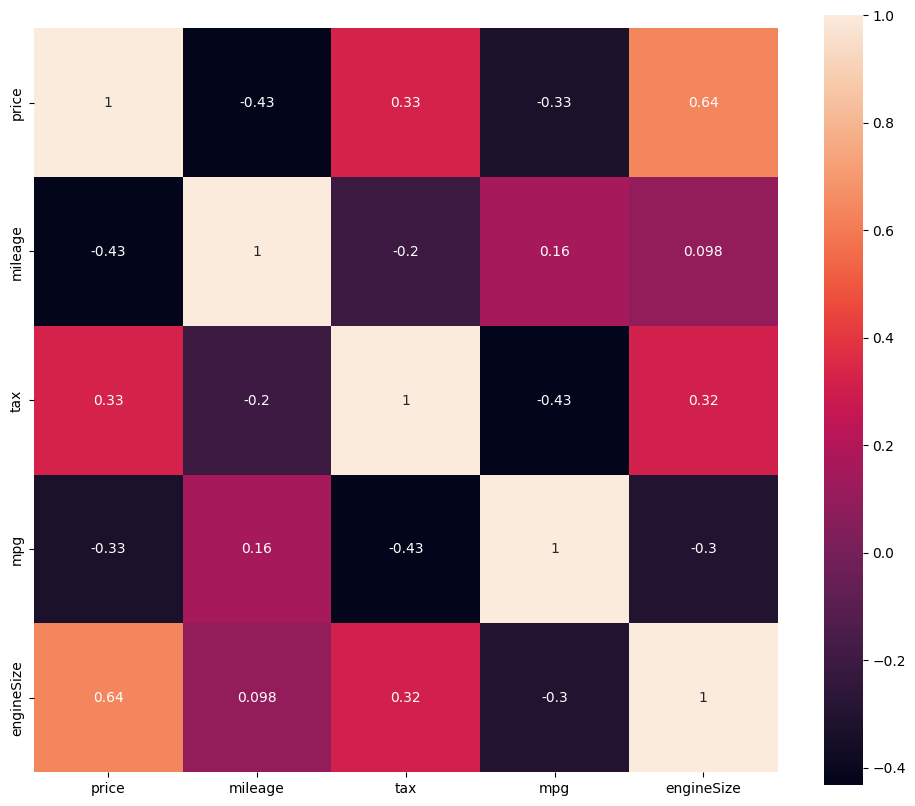

In [ ]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=['number']).corr(), square = True, annot=True)
plt.show()

Анализ Vif коэфециентов

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                       for i in range(len(X.columns))]

    return vif_data.sort_values("VIF", ascending=False)

X = df.select_dtypes(include=[np.number]).drop('price', axis=1)

vif_results = calculate_vif(X)
print("VIF коэффициенты:")
print(vif_results)

VIF коэффициенты:
      feature       VIF
3  engineSize  7.834224
2         mpg  4.609945
1         tax  4.578832
0     mileage  2.342760


engineSize находится в пределах от 5 - 10, следовательно наблюдается небольшая мультиколлиниарность на которую можно обратить внимание.

## One-Hot Encoder

Кодируе котигориальные переменные с помощью OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


categor = df[['model', 'transmission','fuelType', 'year']]

enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
enc.fit(categor)
codes = enc.transform(categor)

feature_names = enc.get_feature_names_out(categor.columns)

codes_df = pd.DataFrame(codes, columns=feature_names, index=df.index)

data_onehot = pd.concat([
    df[['price', 'mileage','tax', 'mpg', 'engineSize']],
    codes_df
], axis=1)

print(f"Исходные строки: {len(df)}")
print(f"Результат строк: {len(data_onehot)}")
print(f"Добавлено столбцов: {data_onehot.shape[1] - df.shape[1]}")

Исходные строки: 65532
Результат строк: 65532
Добавлено столбцов: 161


Посмотрим на полученный датафрейм

In [ ]:
data_onehot

,price,mileage,tax,mpg,engineSize,model_1 Series,model_180,model_2 Series,model_200,model_220,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,11200,67068,125,57,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27000,14827,145,42,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,16000,62794,160,51,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,12750,26676,145,72,1.5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,14500,39554,160,50,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65533,5500,30000,20,58,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65534,4985,36154,125,50,1.3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65535,4995,46000,125,57,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65536,3995,60700,125,50,1.3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train-test split

Разделим на треин-тест выборки

In [ ]:
from sklearn.model_selection import train_test_split

X_train_, X_test_, y_train_, y_test_ = train_test_split(data_onehot.drop(['price'], axis=1), data_onehot['price'], test_size=0.2)

# Обучение

Стандартизируем переменные

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train_)
X_test_ = scaler.transform(X_test_)

Обучение линейной регресии и применение cross validation 

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train_, y_train_)
preds = linear_model.predict(X_test_)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_linear = cross_val_score(linear_model, X_train_, y_train_,
                                   cv=kfold, scoring='r2')

print(f'Cross-val R2: {cv_scores_linear.mean():.4f} (+/- {cv_scores_linear.std() * 2:.4f})')

f'r2 = {r2_score(y_test_, preds)} RMSE = {root_mean_squared_error(y_test_, preds)} MAPE = {mean_absolute_percentage_error(y_test_, preds)}, MedAE = {median_absolute_error(y_test_, preds)}'

'r2 = 0.8890165629410524 MSE = 12290732.98511318 MAPE = 0.15343493568826566, MedAE = 1711.5239467684805'

Инициализация и обучение Гребневой регрессии

In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train_, y_train_)
preds_l2 = ridge_model.predict(X_test_)

cv_scores_ridge = cross_val_score(ridge_model, X_train_, y_train_,
                                  cv=kfold, scoring='r2')

print(
    f'Cross-val R2: {cv_scores_ridge.mean():.4f} (+/- {cv_scores_ridge.std() * 2:.4f})')

f'r2 = {r2_score(y_test_, preds_l2)} RMSE = {root_mean_squared_error(y_test_, preds_l2)} MAPE = {mean_absolute_percentage_error(y_test_, preds_l2)}'

'r2 = 0.8890172365960765 MSE = 12290658.381962977 MAPE = 0.1534316045958103'

Применение метода главных компонентов

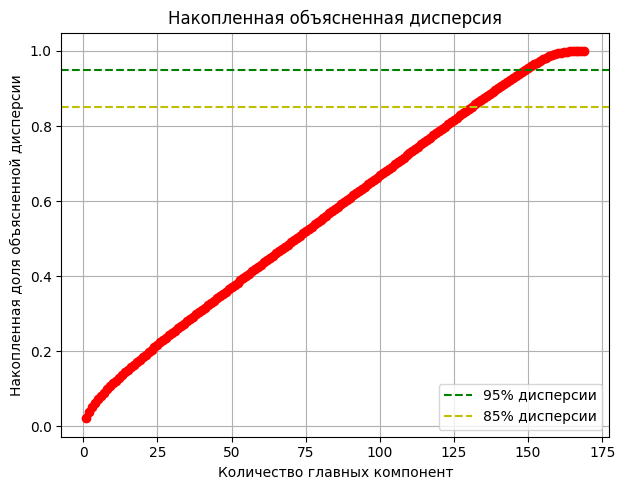


Исходная размерность: (65532, 169)
Размерность после PCA: (65532, 131)
Объясненная дисперсия: 0.8517


In [ ]:
from sklearn.decomposition import PCA


scaler = StandardScaler()
x = scaler.fit_transform(data_onehot.drop(['price'],axis=1))

pca_full = PCA()
pca_full.fit(x)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
plt.xlabel('Количество главных компонент')
plt.ylabel('Накопленная доля объясненной дисперсии')
plt.title('Накопленная объясненная дисперсия')
plt.grid(True)
plt.axhline(y=0.95, color='g', linestyle='--', label='95% дисперсии')
plt.axhline(y=0.85, color='y', linestyle='--', label='85% дисперсии')
plt.legend()

plt.tight_layout()
plt.show()

n_components_95 = np.argmax(cumulative_variance >= 0.85) + 1

pca = PCA(n_components=n_components_95)
X_pca = pca.fit_transform(x)

print(f"\nИсходная размерность: {x.shape}")
print(f"Размерность после PCA: {X_pca.shape}")
print(f"Объясненная дисперсия: {pca.explained_variance_ratio_.sum():.4f}")

РАЗДЕЛЕНИЕ НА ТРЕНИРОВОЧНУЮ И ТЕСТОВУЮ ВЫБОРКИ С PCA

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, data_onehot['price'], test_size=0.2, random_state=42
)

Лин.модель на PCA

In [ ]:
linear_pca = LinearRegression()
linear_pca.fit(X_train_pca, y_train_pca)
preds_p = linear_pca.predict(X_test_pca)

print(f'r2 = {r2_score(y_test_, preds_p)} RMSE = {root_mean_squared_error(y_test_, preds_p)} MAPE = {mean_absolute_percentage_error(y_test_, preds_p)}')

r2 = -0.9218524074532843 MSE = 212833332.6373668 MAPE = 0.7380855859824396


Ridge на PCA

In [ ]:
ridge_pca = Ridge()
ridge_pca.fit(X_train_pca, y_train_pca)
preds_p_l2 = linear_pca.predict(X_test_pca)

print(f'r2 = {r2_score(y_test_, preds_p_l2)} RMSE = {root_mean_squared_error(y_test_, preds_p_l2)} MAPE = {mean_absolute_percentage_error(y_test_, preds_p_l2)}')

r2 = -0.9218524074532843 MSE = 212833332.6373668 MAPE = 0.7380855859824396


Сравнивая полученные результаты, можно точно сказать, что применение метода главных компонентов не подошло для нашего датасета и модели.